<table width='100%'>
<tr>
<td style='background-color:white'>
    <p align="left">
    Exercises for the course<br>
        <b>Machine Learning for Data Science</b><br>
    Winter Semester 2024/25
    </p>
</td>
<td style='background-color:white'>
    G. Montavon<br>
    Institute of Computer Science<br>
    <b>Department of Mathematics and Computer Science</b><br>
    Freie Universität Berlin
</td>
</tr>
</table>

<br>
<center>
    <h1>Exercise Sheet 3 (programming part)</h1>
</center>
<br>

In [21]:
import numpy
import sklearn
import sklearn.datasets
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In this exercise we perform a principal component analysis of the Iris dataset, a famous dataset from Fisher (1936) which one can access from sklearn. Each instance of the dataset is an iris plant which comes with four measurements (1. sepal length in cm, 2. sepal width in cm, 3. petal length in cm, 4. petal width in cm). What these measurements correspond to is depicted in the image below.

![](iris_measurements.png)

In addition to these measurements, the dataset also includes for each instance the type of iris plant (iris setosa, iris versicolour, iris virginica) which we treat here as metadata. Overall, the Iris dataset has 150 instances, and can be stored as an array of size 150 x 4.

The following cell loads the dataset. Additionally, some logarithmic transformation of the input features is performed so that a difference between e.g. 5mm and 6mm is given roughly the same importance as a difference between 5cm and 6cm. Such log-scaling gives more focus on features measuring smaller objects, compared to an approach based on the raw measurements. Also, we add a small increment of 1mm before applying the log-transform to ignore very small quantities that cannot be precisely measured.

In [22]:
dataset = sklearn.datasets.load_iris()

X = numpy.log(0.1+dataset['data'])
T = dataset['target']

target_names = dataset['target_names']
feature_names = dataset['feature_names']

X = X - X.mean(axis=0)

N,d = X.shape

Note that one must keep in mind that our features have been log-transformed in any of the subsequent analyses and interpretations. A first basic analysis that can be performed is to measure how much dispersion there is in the data. The total variance of the data can be computed by the code below:

In [23]:
stot = (X**2).mean(axis=0).sum()
print('Total variance: %.3f'%stot)

Total variance: 1.027


## Exercise 3  (10 + 10 + 10 P)

We now would like to shed more light into the data by performing a principal component analysis (PCA). The exercise will consist of implementing PCA and then perform various analyses based on the learned model.

### Implementing PCA

The simplest way of implementing PCA, is through an eigendecomposition of the data covariance matrix $\Sigma$, followed by solving the eigenvalue equation $\Sigma \boldsymbol{u} = \lambda \boldsymbol{u}$.

**Task: Implement the PCA algorithm. Your code should return a tuple consisting of (1) a vector `L` containing the $d$ eigenvalues, in decreasing order, and (2) a matrix `U` where each column contains the eigenvector associated to the eigenvalue.**

Eigenvectors in this matrix should be ordered according to the eigenvalues, i.e. in a way that, for all indices $i=1\dots d$, the column `U[:,i]` contains the eigenvector associated to the eigenvalue `L[i]`.

In [24]:
import numpy as np

def PCA(X):
    covariance_matrix = np.cov(X, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1] #soring in decending order
    L = eigenvalues[sorted_indices]
    U = eigenvectors[:, sorted_indices]
    
    return L, U

L, U = PCA(X)
print("Eigenvalues:", L)
print("Eigenvectors:\n", U)

Eigenvalues: [1.00021068 0.01755264 0.01300572 0.00267969]
Eigenvectors:
 [[-0.11489579 -0.37596276 -0.35613464  0.84771403]
 [ 0.06357822 -0.91446113 -0.00630853 -0.39959837]
 [-0.56082242  0.1142948  -0.74665504 -0.33900025]
 [-0.81745641 -0.09669306  0.56181365  0.08234618]]


As mentioned in the lecture, PCA can be seen as a way of decomposing the total variance in the data. This decomposition of variance offered by PCA can be rendered in a PCA scree plot. (The following code further verifies that the PCA scree plot corresponds to a decomposition of the total variance, i.e. that the sum of plotted eigenvalues should be equivalent to the measured total variance.)

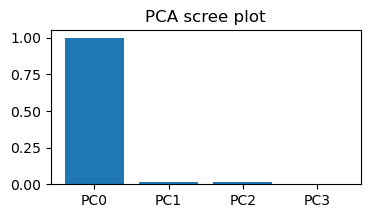

Total variance: 1.027
Sum of eigenvalues: 1.033


In [25]:
plt.figure(figsize=(4,2))
plt.title ('PCA scree plot')
plt.bar(numpy.arange(d),L)
plt.xticks(range(d),labels=['PC%d'%i for i in range(d)])
plt.show()

print('Total variance: %.3f'%stot)
print('Sum of eigenvalues: %.3f'%L.sum())

We observe that the first principal component captures most of the variance in the data. This suggests that one or a few strongly covariate features capture most of the variations in the data.

### Understanding the First Principal Component

We now would like to gain understanding of this highly explanatory first principal component, specifically, to which input features this component responds. For this, we recall that the projection of data on a principal component has the dot-product form

$$
z = \boldsymbol{u}^\top \boldsymbol{x} = u_1 x_1 + u_2 x_2 + \dots + u_d x_d
$$

where in our case, $\boldsymbol{u}$ is the principal component stored in our column vector ``U[:,0]``.

**Task: Write code that displays this projection operation instantiated to our particular problem formulation and PCA model.**

In [26]:
# ------------------------------------------
# TODO: Replace by your code
def printformula(U, feature_names):
    pc1 = U[:, 0] #extracting first principal component
    formula = "z = " + " + ".join(f"{round(pc1[i], 2)}*{feature_names[i]}" for i in range(len(feature_names)))
    
    print(formula)

printformula(U, feature_names)
# ------------------------------------------
#import solution
#solution.printformula(U,feature_names)
# ------------------------------------------

z = -0.11*sepal length (cm) + 0.06*sepal width (cm) + -0.56*petal length (cm) + -0.82*petal width (cm)


As can be observed from the formula above, the first principal component responds mostly to a combination of petal length and petal width. It is on the other hand rather insensitive to sepal-related features.

### Understanding the First Principal Component

We now would like to get understanding of the data projected on this principal component. The main advantage of looking at the PCA space instead of the feature space is that its dimensionality has been reduced, thereby allowing for using tools such as simple histograms without performing a priori feature selection. The following code projects our data on the first principal component:

In [27]:
Z = X.dot(U[:,0])

**Task: Write code that visualizes the projected data in the form of a histogram. Specifically, your visualization should split data according to the meta-data (here, the distinct plant species), and produce for each of them a distinct histogram with a specific color.**

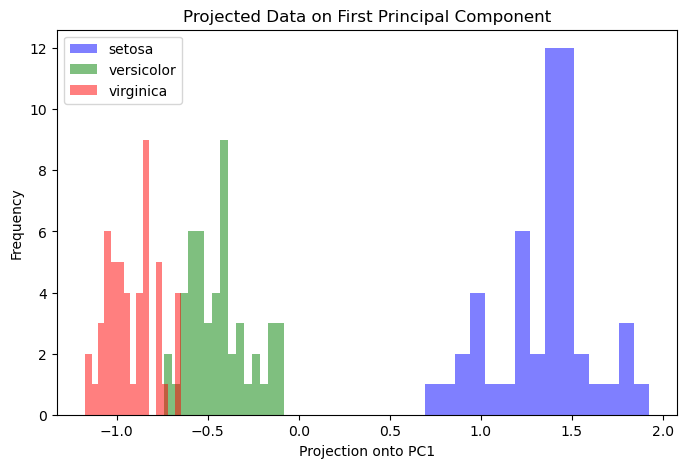

In [28]:
# TODO: Replace by your code
import matplotlib.pyplot as plt

def PCAplot(Z, T, target_names):
    colors = ['blue', 'green', 'red']
    
    # histogram plot
    plt.figure(figsize=(8, 5))
    for i, target in enumerate(np.unique(T)):
        plt.hist(Z[T == target], bins=15, color=colors[i], alpha=0.5, label=target_names[target])
    plt.title("Projected Data on First Principal Component")
    plt.xlabel("Projection onto PC1")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

Z = X.dot(U[:, 0])
PCAplot(Z, T, target_names)
# ------------------------------------------
#import solution
#solution.PCAplot(Z,T,target_names)

From this analysis, we can observe that the principal component represent meaningful variations in the data, in particular, species appear to be separable. The Iris setosa is separated from the other two species by a large margin, whereas the two other species are also separated to a certain extent, but not fully.